<a href="https://colab.research.google.com/github/Shivp55/ComputerVision/blob/main/CV_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install split-folders

In [7]:
import splitfolders
import os

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Source and destination folder paths
source_folder_path = "/content/drive/MyDrive/imagenette2"
destination_folder_path = "/content/drive/MyDrive/imagenette_data1"

# Copy the folder recursively
shutil.copytree(source_folder_path, destination_folder_path)


'/content/drive/MyDrive/imagenette_data1'

##Splitting the Data

In [ ]:
import os
import shutil

# Define paths to validation and training folders
validation_folder = "/content/drive/MyDrive/imagenette_data1/val"
training_folder = "/content/drive/MyDrive/imagenette_data1/train"

# Iterate over class folders in the validation folder
for class_folder in os.listdir(validation_folder):
    class_folder_path = os.path.join(validation_folder, class_folder)
    if os.path.isdir(class_folder_path):
        # Check if the corresponding class folder exists in the training folder
        training_class_folder_path = os.path.join(training_folder, class_folder)
        if os.path.exists(training_class_folder_path):
            # Iterate over files in the class folder of the validation set
            for file_name in os.listdir(class_folder_path):
                file_path = os.path.join(class_folder_path, file_name)
                # Copy the file to the corresponding class folder in the training set
                shutil.copy(file_path, training_class_folder_path)
            print(f"Files from '{class_folder}' in the validation set copied to training set.")
        else:
            print(f"Corresponding class folder '{class_folder}' does not exist in the training set.")
    else:
        print(f"'{class_folder}' is not a folder.")

print("Copy process completed.")


Files from 'n03888257' in the validation set copied to training set.
Files from 'n03000684' in the validation set copied to training set.
Files from 'n03417042' in the validation set copied to training set.
Files from 'n03425413' in the validation set copied to training set.
Files from 'n03028079' in the validation set copied to training set.
Files from 'n03394916' in the validation set copied to training set.
Files from 'n03445777' in the validation set copied to training set.
Files from 'n02979186' in the validation set copied to training set.
Files from 'n02102040' in the validation set copied to training set.
Files from 'n01440764' in the validation set copied to training set.
Copy process completed.


In [ ]:
import os
import shutil
import splitfolders

# Define paths

data_folder = '/content/drive/MyDrive/imagenette_data1'  # Update this with the path to your data folder
output_folder = '/content/drive/MyDrive/Imagenette'


train_folder = os.path.join(data_folder, 'train')


# Step 3: Count number of images in each class folder
class_image_count = {}
for class_folder in os.listdir(train_folder):
    class_path = os.path.join(train_folder, class_folder)
    if os.path.isdir(class_path):  # Check if it's a directory
        num_images = len(os.listdir(class_path))
        class_image_count[class_folder] = num_images

# Step 4: Sort classes based on the number of images
sorted_classes = sorted(class_image_count.items(), key=lambda x: x[1])

# Step 5: Delete the classes with the lowest number of images (4 classes)
num_classes_to_delete = 4
classes_to_delete = [class_name for class_name, _ in sorted_classes[:num_classes_to_delete]]

for class_name in classes_to_delete:
    class_path = os.path.join(train_folder, class_name)
    shutil.rmtree(class_path)
    print(f"Deleted class: {class_name}")


# Step 6: Split data into train, validation, and test sets
splitfolders.ratio(train_folder, output=output_folder, seed=42, ratio=(0.70, 0.15, 0.15))

print("Data processing completed successfully.")


Copying files: 8100 files [03:39, 36.92 files/s]

Data processing completed successfully.


In [140]:
# Define the paths to the ImageNet datasets
dataset_paths = {
    'train': '/content/drive/MyDrive/Imagenette/train',
    'val': '/content/drive/MyDrive/Imagenette/val',
    'test': '/content/drive/MyDrive/Imagenette/test'
}

# Function to count the number of images in each class
def count_images_per_class(dataset_folder):
    class_counts = {}
    for class_folder in os.listdir(dataset_folder):
        class_path = os.path.join(dataset_folder, class_folder)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_folder] = num_images
    return class_counts

# Iterate over dataset paths and count images for each
for split, path in dataset_paths.items():
    print(f"Number of images per class in {split} set:")
    class_counts = count_images_per_class(path)
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count}")

Number of images per class in train set:
n03417042: 944
n03028079: 944
n03425413: 944
n03445777: 944
n01440764: 944
n02102040: 944
Number of images per class in val set:
n03417042: 202
n03028079: 202
n03425413: 202
n03445777: 202
n01440764: 202
n02102040: 202
Number of images per class in test set:
n03417042: 204
n03028079: 204
n03425413: 204
n03445777: 204
n01440764: 204
n02102040: 204


In [9]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras import callbacks
from keras.callbacks import EarlyStopping

In [ ]:
# Dictionary mapping original labels to new labels
label_mapping = {
    'n03425413': 'gas_station',
    'n03888257': 'parachute',
    'n03445777':'golf',
    'n03394916':'horn',
    'n03028079':'church',
    'n03417042':'garbage_truck'
}

# List of data folders
data_folders = ['train', 'val', 'test']

# Path to your main dataset folder
main_dataset_folder_path = '/content/Imagenet_final'

# Iterate through each data folder
for data_folder in data_folders:
    # Path to the specific data folder (train, validation, or test)
    dataset_folder_path = os.path.join(main_dataset_folder_path, data_folder)

    # Iterate through folders and rename them
    for original_label, new_label in label_mapping.items():
        original_folder_path = os.path.join(dataset_folder_path, original_label)
        new_folder_path = os.path.join(dataset_folder_path, new_label)
        os.rename(original_folder_path, new_folder_path)
        print(f"Renamed folder '{original_label}' in '{data_folder}' to '{new_label}'")

print("Folder renaming complete.")


Renamed folder 'n03425413' in 'train' to 'gas_station'
Renamed folder 'n03888257' in 'train' to 'parachute'
Renamed folder 'n03445777' in 'train' to 'golf'
Renamed folder 'n03394916' in 'train' to 'horn'
Renamed folder 'n03028079' in 'train' to 'church'
Renamed folder 'n03417042' in 'train' to 'garbage_truck'
Renamed folder 'n03425413' in 'val' to 'gas_station'
Renamed folder 'n03888257' in 'val' to 'parachute'
Renamed folder 'n03445777' in 'val' to 'golf'
Renamed folder 'n03394916' in 'val' to 'horn'
Renamed folder 'n03028079' in 'val' to 'church'
Renamed folder 'n03417042' in 'val' to 'garbage_truck'
Renamed folder 'n03425413' in 'test' to 'gas_station'
Renamed folder 'n03888257' in 'test' to 'parachute'
Renamed folder 'n03445777' in 'test' to 'golf'
Renamed folder 'n03394916' in 'test' to 'horn'
Renamed folder 'n03028079' in 'test' to 'church'
Renamed folder 'n03417042' in 'test' to 'garbage_truck'
Folder renaming complete.


In [ ]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Imagenette/train',
    labels ='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(64,64)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Imagenette/val',
    labels ='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(64,64)
)
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Imagenette/test',
    labels ='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(64,64)
)

Found 5664 files belonging to 6 classes.
Found 1212 files belonging to 6 classes.
Found 1224 files belonging to 6 classes.


In [ ]:
#Normalize the data
def process(image,label):
  image=tf.cast(image/255, tf.float32)
  return image,label

train_ds= train_ds.map(process)
validation_ds= validation_ds.map(process)
test_split_ds=test_ds.map(process)

In [142]:
#Building Baseline CNN Model

model = Sequential()

#Add Convolution Layers -32 filters
model.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='glorot_uniform',dilation_rate=(1,1), strides=(1,1),activation='relu', input_shape=(64,64,3)))
model.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='glorot_uniform',dilation_rate=(1,1), strides=(1,1),activation='relu'))
#Add pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#Add Convolution Layers -64 filters
model.add(Conv2D(64, kernel_size=(3,3), dilation_rate=(1,1),kernel_initializer='glorot_uniform',strides=(1,1),activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), dilation_rate=(1,1),kernel_initializer='glorot_uniform',strides=(1,1),activation='relu'))
#Add Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten Layers into 1D
model.add(Flatten())

#Fully Connected Nueral Network
model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation='softmax'))

#Model summary
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_61 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_62 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_63 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                               

In [143]:
#compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [144]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
159/177 [=========================>....] - ETA: 12s - loss: 1.3651 - accuracy: 0.4601

KeyboardInterrupt: 

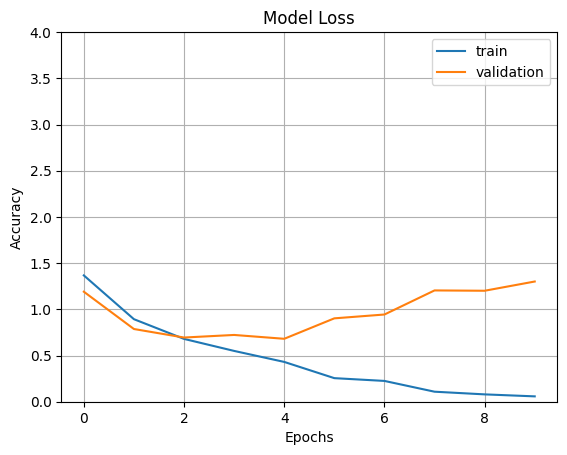

In [ ]:
#Baseline model performance graph
Model_Accuracy = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0,ymax=4)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

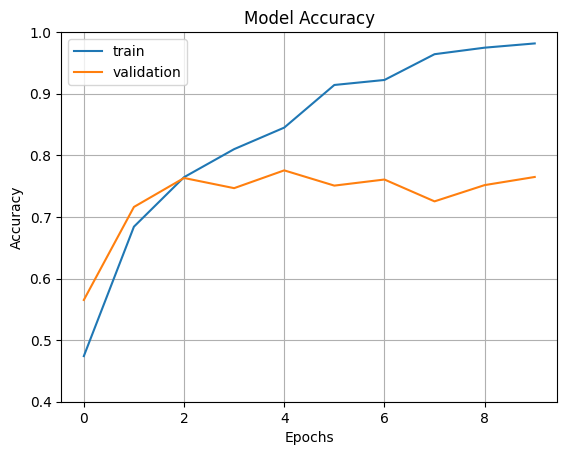

In [ ]:
#Baseline model performance graph
Model_Accuracy = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [141]:
model.evaluate(test_ds)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 6) are incompatible


In [ ]:
#Saving baseline model as h5 format
model.save('/content/drive/MyDrive/models/Final_model.h5')

In [47]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Load the model
model = load_model('/content/drive/MyDrive/models/Final_model.h5')


img = cv2.imread('/content/church.jpg')
img = cv2.resize(img,(64,64))
img = np.reshape(img,[1,64,64,3])

classes = model.predict(img)

print(classes)

1/1 [==============================] - 0s 288ms/step
[[0. 0. 1. 0. 0. 0.]]


### **Fine Tuning the Base line Model - Model 1**

In [19]:
#Data Augmentation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


In [20]:
#Building a Fine Tuned Model
#generators
batch_size=32

train_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)
val_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)
test_datagen=ImageDataGenerator(rescale=1./255)

In [21]:
#Generate Augmented Data
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Imagenette/train',
    target_size=(64,64),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = val_datagen.flow_from_directory(
'/content/drive/MyDrive/Imagenette/val',
 target_size=(64, 64),
 batch_size=batch_size,
 class_mode='categorical')

test_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Imagenette/test',
    target_size=(64, 64),
    batch_size=20,
    class_mode='categorical'
)

Found 5664 images belonging to 6 classes.
Found 1212 images belonging to 6 classes.
Found 1224 images belonging to 6 classes.


In [52]:
#Build Model
#Building Baseline CNN Model

model = Sequential()

#Add Convolution Layers -32 filters
model.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='he_normal',activation='relu', input_shape=(64,64,3), kernel_regularizer=tf.keras.regularizers.l2(0.03)))
#model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='he_normal',activation='relu'))
#model.add(BatchNormalization())
#Add pooling
model.add(MaxPooling2D(pool_size=(2,2),padding='same', strides=2))

#Add Convolution Layers -64 filters
model.add(Conv2D(64, kernel_size=(3,3),kernel_initializer='he_normal',activation='relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3),kernel_initializer='he_normal',activation='relu'))
#model.add(BatchNormalization())
#Add Pooling
model.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=2))

#Flatten Layers into 1D
model.add(Flatten())

#Fully Connected Nueral Network
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

#Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                 

In [53]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Learning Rate Schedule
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

In [56]:
#compile fine tuned model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
history1=model.fit_generator(
    train_generator,
    steps_per_epoch=70,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=None,
    callbacks=[reduce_lr]
)

<ipython-input-57-2446b50b113f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1=model.fit_generator(


Epoch 1/10
70/70 [==============================] - 78s 1s/step - loss: 2.4274 - accuracy: 0.3830 - val_loss: 2.2616 - val_accuracy: 0.4389 - lr: 0.0010
Epoch 2/10
70/70 [==============================] - 81s 1s/step - loss: 2.2156 - accuracy: 0.4429 - val_loss: 2.2292 - val_accuracy: 0.4183 - lr: 0.0010
Epoch 3/10
70/70 [==============================] - 71s 1s/step - loss: 2.0914 - accuracy: 0.4723 - val_loss: 1.9643 - val_accuracy: 0.5190 - lr: 0.0010
Epoch 4/10
70/70 [==============================] - 73s 1s/step - loss: 1.9482 - accuracy: 0.5045 - val_loss: 1.8645 - val_accuracy: 0.5338 - lr: 0.0010
Epoch 5/10
70/70 [==============================] - 75s 1s/step - loss: 1.8799 - accuracy: 0.5321 - val_loss: 1.7291 - val_accuracy: 0.5611 - lr: 0.0010
Epoch 6/10
70/70 [==============================] - 78s 1s/step - loss: 1.7888 - accuracy: 0.5406 - val_loss: 1.7451 - val_accuracy: 0.5454 - lr: 0.0010
Epoch 7/10
70/70 [==============================] - 79s 1s/step - loss: 1.6756 - a

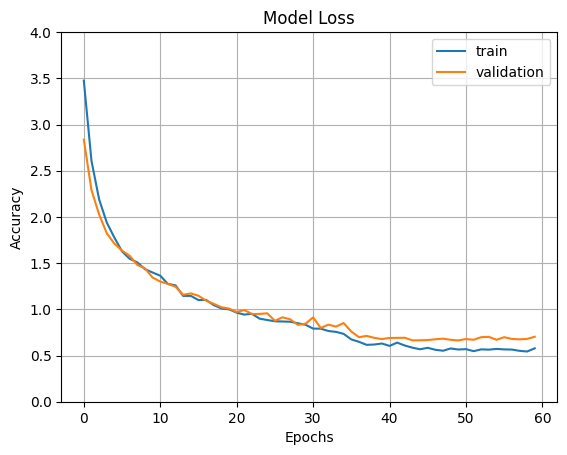

In [26]:
#Baseline model performance graph
Model_Accuracy = plt.gcf()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.axis(ymin=0,ymax=4)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

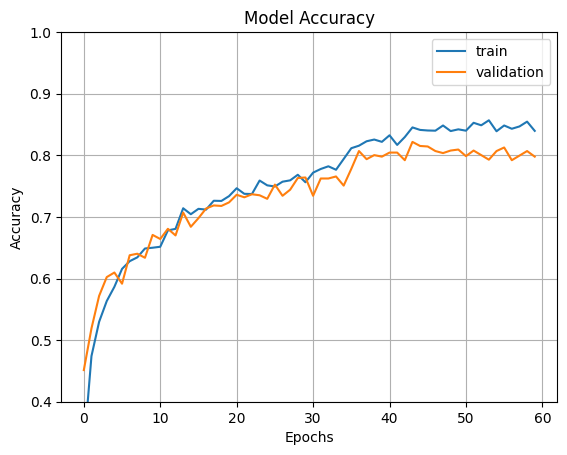

In [27]:
#Baseline model performance graph
Model_Accuracy = plt.gcf()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [31]:
test_generator = test_datagen.flow_from_directory(
 '/content/drive/MyDrive/Imagenette/test',
 target_size=(64, 64),
 batch_size=16,
 class_mode='categorical')
results = model.evaluate_generator(
 test_generator,
 steps=1000)
print('Final test accuracy:', (results[1]*100.0))

Found 1224 images belonging to 6 classes.


<ipython-input-31-c65cc812bbb8>:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  results = model.evaluate_generator(


Final test accuracy: 79.73856329917908


In [32]:
#Saving First Fine Tuned model in h5 format
model.save('/content/drive/MyDrive/models/First_Fine_Tuned_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 130ms/step
Predicted item Class: 4


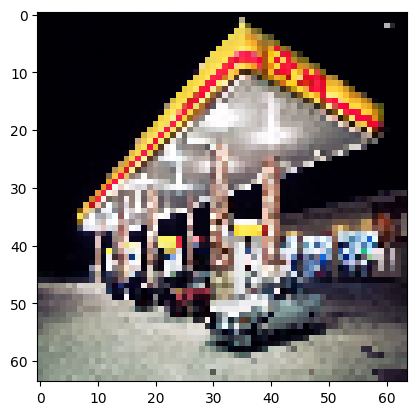

In [51]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# Load the model
model = load_model('/content/drive/MyDrive/models/First_Fine_Tuned_model.h5')

# Load image and turn value to array

img = load_img('/content/gs.jpg', target_size=(64, 64))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.0
preds = model.predict(x)
print('Predicted item Class:', np.argmax(preds[0]))
# Print the predicted class

plt.imshow(img)
plt.show()

Model 3: Trying another set of Hyper Parameter Tuning to Improve the baseline model

In [ ]:
import shutil
import os

# Define the folder path you want to delete
folder_path = '/content/drive/MyDrive/Imagenette'

# Function to delete a folder recursively
def delete_folder(folder_path):
    try:
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_path}' successfully deleted.")
    except Exception as e:
        print(f"Error deleting folder: {e}")

# Check if the folder exists
if os.path.exists(folder_path):
    # Delete the folder
    delete_folder(folder_path)
else:
    print(f"The folder '{folder_path}' does not exist.")


Folder '/content/drive/MyDrive/Imagenette' successfully deleted.
